<a href="https://colab.research.google.com/github/tadiwamark/OverallScorePrediction/blob/main/FIFA2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

root_path = 'gdrive/My Drive/Colab Notebooks/FIFA/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd  
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objs as go
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

### Connecting kaggle with Google colab
Instructions on: https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download stefanoleone992/fifa-20-complete-player-dataset

fifa-20-complete-player-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip fifa-20-complete-player-dataset.zip

Archive:  fifa-20-complete-player-dataset.zip
replace players_15.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y,A
  inflating: players_15.csv          
replace players_16.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace players_17.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace players_18.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace players_19.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace players_20.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace teams_and_leagues.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


### Data Exploration

In [ ]:
#data = pd.read_csv(root_path+"players_15.csv") 
data=pd.read_csv("players_15.csv")
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,93,95,0,0,CF,Left,5,3,4,Medium/Low,Normal,Yes,NaN,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",CF,10.0,NaN,2004-07-01,2018.0,CF,10.0,93.0,89.0,86.0,96.0,27.0,63.0,NaN,NaN,NaN,...,48,22,92-1,90,76,NaN,25,21,20,6,11,15,14,8,89+3,89+3,89+3,92+3,90+3,90+3,90+3,92+3,92+3,92+3,92+3,90+3,79+3,79+3,79+3,90+3,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,92,92,0,0,"LW, LM",Right,5,4,5,High/Low,Normal,Yes,NaN,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2009-07-01,2018.0,LW,7.0,93.0,93.0,81.0,91.0,32.0,79.0,NaN,NaN,NaN,...,63,24,91+2,81,85,NaN,22,31,23,7,11,15,14,11,91+3,91+3,91+3,89+3,91+3,91+3,91+3,89+3,89+3,89+3,89+3,87+3,77+3,77+3,77+3,87+3,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,90,90,0,0,"RM, LM, RW",Left,5,2,4,High/Low,Normal,Yes,NaN,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",SUB,10.0,NaN,2009-08-28,2017.0,RS,11.0,93.0,86.0,83.0,92.0,32.0,64.0,NaN,NaN,NaN,...,47+9,39+1,89+2,84+2,80+1,NaN,29,26+2,26+1,10,8,11,5,15,84+3,84+3,84+3,88+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,78+3,78+3,78+3,87+3,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,90,90,0,0,ST,Right,5,4,4,Medium/Low,Normal,Yes,NaN,"#Poacher, #Aerial Threat, #Distance Shooter, #...",ST,10.0,NaN,2012-07-01,2016.0,ST,10.0,76.0,91.0,81.0,86.0,34.0,86.0,NaN,NaN,NaN,...,84,20,86,83-1,91,NaN,25,41-8,27,13,15,10,9,12,87+3,87+3,87+3,84+3,86+3,86+3,86+3,84+3,86+3,86+3,86+3,83+3,76+3,76+3,76+3,83+3,61+3,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,90,90,0,0,GK,Right,5,4,1,Medium/Medium,Normal,Yes,NaN,NaN,GK,1.0,NaN,2011-07-01,2019.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,85.0,92.0,...,29+3,30+8,25,20,37,NaN,25,25,25,87,85+3,92,90+6,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data["attacking_heading_accuracy"]

0        71
1        86
2        50
3        76
4        25
         ..
15460    41
15461    43
15462    57
15463    38
15464    29
Name: attacking_heading_accuracy, Length: 15465, dtype: object

In [ ]:
print("The Shape of the data:- ", data.shape)

The Shape of the data:-  (15465, 104)


In [ ]:
data["overall"]

0        93
1        92
2        90
3        90
4        90
         ..
15460    41
15461    41
15462    40
15463    40
15464    40
Name: overall, Length: 15465, dtype: int64

In [ ]:
print(list(data.columns))

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_

In [ ]:
data.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,mentality_composure
count,15465.000000,15465.000000,15465.000000,15465.000000,15465.000000,15465.000000,15465.0,15465.0,15465.000000,15465.000000,15465.000000,0.0,15233.000000,15226.000000,1056.000000,13762.000000,13762.000000,13762.000000,13762.000000,13762.000000,13762.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,0.0
mean,189298.588425,24.763272,181.093631,75.482703,63.948594,68.483091,0.0,0.0,1.126350,2.932363,2.267055,NaN,19.803584,2016.959740,12.026515,68.088432,51.671777,55.744223,60.617861,50.000799,64.602456,64.709336,60.823840,59.455079,65.955373,43.900763,61.230182,NaN
std,39648.820272,4.624565,6.635182,6.907243,7.208610,6.611708,0.0,0.0,0.401362,0.652270,0.719035,NaN,16.547682,2.069059,6.661003,11.004400,13.443599,10.765868,10.800142,15.850317,9.698882,7.855747,8.510626,8.689929,8.374343,8.440858,9.188257,NaN
min,2.000000,16.000000,155.000000,50.000000,40.000000,40.000000,0.0,0.0,1.000000,1.000000,1.000000,NaN,1.000000,2014.000000,1.000000,22.000000,22.000000,24.000000,25.000000,21.000000,28.000000,35.000000,36.000000,21.000000,31.000000,20.000000,38.000000,NaN
25%,178043.000000,21.000000,176.000000,70.000000,59.000000,64.000000,0.0,0.0,1.000000,3.000000,2.000000,NaN,8.000000,2015.000000,6.000000,62.000000,41.000000,49.000000,54.000000,33.000000,58.000000,59.000000,55.000000,53.000000,60.000000,39.000000,54.000000,NaN
50%,200844.000000,24.000000,181.000000,75.000000,64.000000,68.000000,0.0,0.0,1.000000,3.000000,2.000000,NaN,17.000000,2016.000000,12.000000,69.000000,53.000000,57.000000,62.000000,53.000000,66.000000,64.000000,61.000000,59.000000,65.000000,44.000000,61.000000,NaN
75%,214326.000000,28.000000,186.000000,80.000000,69.000000,73.000000,0.0,0.0,1.000000,3.000000,3.000000,NaN,26.000000,2019.000000,18.000000,76.000000,62.000000,63.000000,68.000000,63.000000,72.000000,70.000000,67.000000,65.000000,72.000000,49.000000,68.000000,NaN
max,225562.000000,44.000000,203.000000,110.000000,93.000000,95.000000,0.0,0.0,5.000000,5.000000,5.000000,NaN,99.000000,2021.000000,28.000000,97.000000,93.000000,91.000000,96.000000,90.000000,91.000000,88.000000,87.000000,92.000000,90.000000,66.000000,90.000000,NaN


In [ ]:
data.drop(['sofifa_id','player_url','long_name','dob','nation_jersey_number','loaned_from'], axis = 1, inplace=True)

In [ ]:
data.isnull().sum().sum()

207614

In [ ]:
null_data = data.isna().sum().sort_values(ascending=False)
null_data = null_data.reset_index(drop = False)
null_data = null_data.rename(columns={"index": "Columns", 0:"Value"})
null_data['proportion'] = (null_data['Value']/len(data))*100
null_data.head()


,Columns,Value,proportion
0,mentality_composure,0,0.0
1,player_positions,0,0.0
2,body_type,0,0.0
3,work_rate,0,0.0
4,skill_moves,0,0.0


In [ ]:
missing = null_data[null_data['proportion']>10]
fig = px.pie(missing, names='Columns', values='proportion',
             color_discrete_sequence=px.colors.sequential.Viridis_r,
             title='Percentage of Missing values in Columns')
fig.update_traces(textposition='inside', textinfo='label')
fig.show()


In [ ]:
numeric_features = ['age','height_cm','weight_kg','overall','potential','value_eur',
                 'wage_eur','international_reputation','weak_foot',
                 'skill_moves','release_clause_eur']
numeric_dataset1 = data[numeric_features]


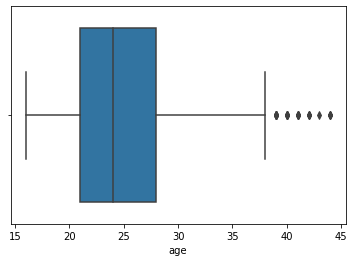

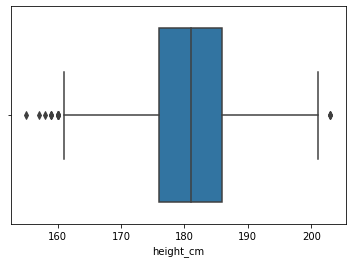

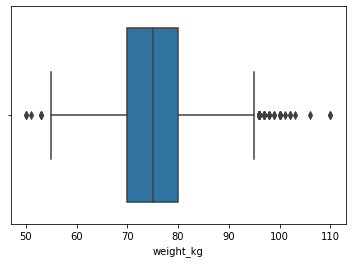

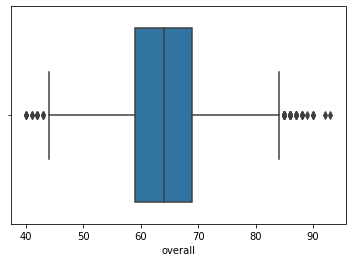

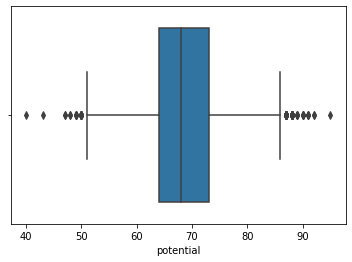

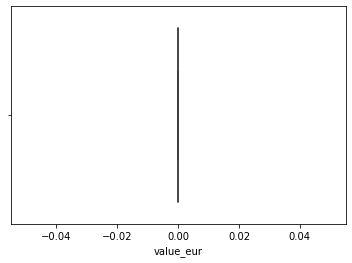

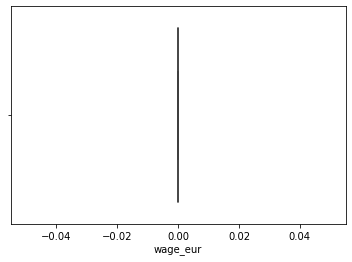

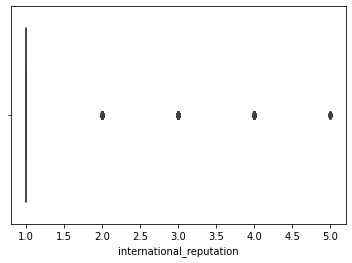

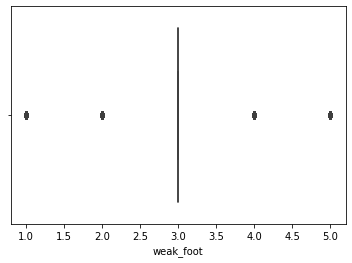

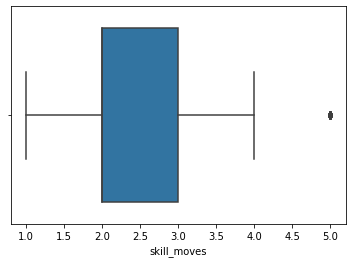

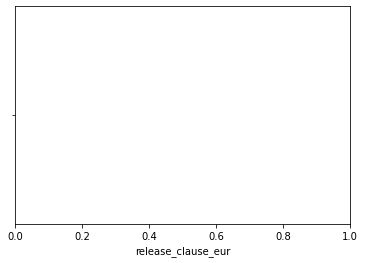

In [ ]:
#checking for outliers in all the numeric features
for col in numeric_dataset1.columns:
    sns.boxplot(x = col, data = data) 
    plt.show()

### Feature Transformation

In [ ]:
col_of_object = list(data.select_dtypes(['object']).columns)


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in col_of_object: 
    data[i] = labelencoder.fit_transform(data[i])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15465 entries, 0 to 15464
Data columns (total 98 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  15465 non-null  int64  
 1   age                         15465 non-null  int64  
 2   height_cm                   15465 non-null  int64  
 3   weight_kg                   15465 non-null  int64  
 4   nationality                 15465 non-null  int64  
 5   club                        15465 non-null  int64  
 6   overall                     15465 non-null  int64  
 7   potential                   15465 non-null  int64  
 8   value_eur                   15465 non-null  int64  
 9   wage_eur                    15465 non-null  int64  
 10  player_positions            15465 non-null  int64  
 11  preferred_foot              15465 non-null  int64  
 12  international_reputation    15465 non-null  int64  
 13  weak_foot                   154

### Feature Selection

In [ ]:
cor = data.corr()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
corr_features = correlation(data, 0.7)


In [ ]:
data.drop(corr_features, axis=1, inplace=True)

In [ ]:
data.shape

(15465, 34)

### Dataset Development

In [ ]:
cols_to_preserve = [
"joined" ,
"power_jumping",
"power_stamina",
"passing" ,
"team_jersey_number" ,
"defending" ,
"shooting" ,
"attacking_heading_accuracy" ,
"height_cm" ,
"age" ] 

In [ ]:
from sklearn.model_selection import train_test_split

data.fillna(0, inplace=True) 
X = data [cols_to_preserve]
y = data["overall"]

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.3, random_state = 0)

### Model Development 

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    
def evaluating_model(y_test, y_pred):  
    ''' 
    Function for evaluating our models.
    '''
    print("MSE", mean_squared_error(y_test, y_pred)) 
    print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("MAE", mean_absolute_error(y_test, y_pred)) 
    print("r2 score", r2_score(y_test, y_pred))

In [ ]:
from sklearn.linear_model import LinearRegression 

lr_clf = LinearRegression() 
lr_clf.fit(X_train, y_train) 
lr_clf_pred = lr_clf.predict(X_test) 

In [ ]:
y_pred = lr_clf.predict(X_test)
evaluating_model(y_test, y_pred)

MSE 28.366891593638883
RMSE 5.326057791053237
MAE 4.169559429048852
r2 score 0.44239782451677234


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr_clf_pip = make_pipeline(StandardScaler(), LinearRegression()) 
lr_clf_pip.fit(X_train, y_train) 

y_pred1 = lr_clf_pip.predict(X_test)
evaluating_model(y_test,y_pred1)

MSE 28.36689159363888
RMSE 5.326057791053237
MAE 4.16955942904885
r2 score 0.44239782451677245


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV 

def randomized_search(params, runs=20, clf=DecisionTreeRegressor(random_state=2)): 
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2) 
    rand_clf.fit(X_train, y_train) 
    best_model = rand_clf.best_estimator_
    best_score = rand_clf.best_score_

    print("Training score: {:.3f}".format(best_score))
    y_pred = best_model.predict(X_test)
    
    return best_model

randomized_search(params={'criterion':["squared_error", "friedman_mse"],
                              'splitter':['random', 'best'],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01],
                          'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
                          'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
                          'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                          'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                          'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                          'max_depth':[None, 2,4,6,8,100],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
                         })

Training score: 0.753


DecisionTreeRegressor(criterion='friedman_mse', max_depth=100, max_features=0.9,
                      min_impurity_decrease=0.0005, min_samples_leaf=0.02,
                      min_samples_split=3, min_weight_fraction_leaf=0.0025,
                      random_state=2)

In [ ]:
ds_clf = DecisionTreeRegressor(criterion='friedman_mse', max_depth=100, max_features=0.9,
                      min_impurity_decrease=0.0005, min_samples_leaf=0.02,
                      min_samples_split=3, min_weight_fraction_leaf=0.0025,
                      random_state=2) 
ds_clf.fit(X_train, y_train) 
pred4 = ds_clf.predict(X_test) 
evaluating_model(y_test, pred4)

MSE 12.135024256881968
RMSE 3.4835361713181574
MAE 2.5776636824014307
r2 score 0.761464314733149


In [ ]:
from sklearn.ensemble import RandomForestRegressor

randomized_search(params={
                         'min_samples_leaf':[1,2,4,6,8,10,20,30],
                          'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
                          'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                          'max_depth':[None,2,100,200,8,250,300], 
                         }, clf=RandomForestRegressor(random_state=2))

Training score: 0.866


RandomForestRegressor(max_depth=100, max_features=0.7, min_samples_leaf=4,
                      random_state=2)

In [ ]:
rf_clf = RandomForestRegressor(max_depth=100, max_features=0.7, min_samples_leaf=4,
                       random_state=2) 
rf_clf.fit(X_train, y_train)  
pred5 = rf_clf.predict(X_test) 
evaluating_model(y_test, pred5)


MSE 6.894503006674097
RMSE 2.625738564037573
MAE 1.8125076717701405
r2 score 0.8644761671293159


In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor(
    max_depth=10,
    n_estimators=1000,
    min_child_weight=0.5, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.1,
    seed=42)

model.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    verbose=True, 
    early_stopping_rounds = 20)


[10:37:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:57.5421	validation_1-rmse:57.4397
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[1]	validation_0-rmse:51.8227	validation_1-rmse:51.7252
[2]	validation_0-rmse:46.6814	validation_1-rmse:46.5829
[3]	validation_0-rmse:42.0503	validation_1-rmse:41.9599
[4]	validation_0-rmse:37.8883	validation_1-rmse:37.7979
[5]	validation_0-rmse:34.1451	validation_1-rmse:34.0546
[6]	validation_0-rmse:30.7756	validation_1-rmse:30.6858
[7]	validation_0-rmse:27.7407	validation_1-rmse:27.6587
[8]	validation_0-rmse:25.0093	validation_1-rmse:24.9347
[9]	validation_0-rmse:22.5591	validation_1-rmse:22.4869
[10]	validation_0-rmse:20.351	validation_1-rmse:20.287
[11]	validation_0-rmse:18.3687	validation_1-rmse:18.3081
[12]	validation_0-rmse:16.5849	validation_

XGBRegressor(colsample_bytree=0.8, eta=0.1, max_depth=10, min_child_weight=0.5,
             n_estimators=1000, seed=42, subsample=0.8)

In [ ]:
pred6 = model.predict(X_test) 
evaluating_model(y_test, pred6)

MSE 7.058680853560882
RMSE 2.656817805864919
MAE 1.8311549507338425
r2 score 0.8612489568342424


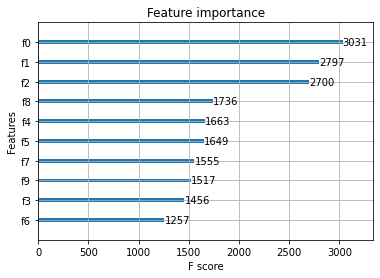

In [ ]:
from xgboost import plot_importance
plot_importance(model)
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbdt = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1,max_depth=4,random_state=0) 
gbdt.fit(X_train, y_train) 

pred_gdbt = gbdt.predict(X_test) 
evaluating_model(y_test, pred_gdbt)

MSE 7.132822541015013
RMSE 2.670734457226142
MAE 1.8539944543222182
r2 score 0.8597915688761029


### We choose XGBoost as our Model to Deploy

In [ ]:
import joblib 
joblib.dump(model, 'XGBoost.pkl') 
model = joblib.load('XGBoost.pkl' ) 
model.predict(X_test)

[10:38:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([73.01686 , 70.28217 , 50.388405, ..., 53.30078 , 64.43906 ,
       71.73551 ], dtype=float32)

In [ ]:
tes  = [[ 45, 25, 12, 25, 12, 12, 15, 25, 25, 12]]
model.predict(tes)

array([51.815792], dtype=float32)

### Streamlit
Link to youtube video: https://youtu.be/_6K1Fvvdnns

In [ ]:
!pip install kora
from kora import console
console.start()  # and click link

     |████████████████████████████████| 57 kB 4.1 MB/s 
     |████████████████████████████████| 56 kB 3.5 MB/s 



In [ ]:
!pip install -q streamlit

     |████████████████████████████████| 9.1 MB 24.7 MB/s 
     |████████████████████████████████| 111 kB 42.8 MB/s 
     |████████████████████████████████| 76 kB 3.3 MB/s 
     |████████████████████████████████| 178 kB 74.4 MB/s 
     |████████████████████████████████| 180 kB 49.5 MB/s 
     |████████████████████████████████| 4.3 MB 41.1 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 125 kB 49.9 MB/s 
     |████████████████████████████████| 791 kB 57.9 MB/s 
     |████████████████████████████████| 374 kB 44.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.23 which is incompatible.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.5.1 which is incompatible.
google-colab 1.0.0 requires ipyth

In [ ]:
!pip install pyngrok

     |████████████████████████████████| 745 kB 25.5 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19006 sha256=816d94a596908a02f8d6c06625ef8ee1a477f570ce5d50e2e928407610da89ac
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [ ]:
get_ipython().system_raw('./ngrok http 8501 &')

In [ ]:
%%writefile streamlitapp.py
import streamlit as st
import pandas as pd
import numpy as np
from utils import *

st.write(
    """ 
# Overall Score Predictor 
"""
)

joined = st.number_input("Enter  joined:")
power_jumping = st.number_input("Enter  power_jumping:")
power_stamina = st.number_input("Enter  power_stamina:")
passing = st.number_input("Enter  passing:")
team_jersey_number = st.number_input("Enter the team_jersey_number:- ")
defending = st.number_input("Enter defending:-")
shooting = st.number_input("Enter shooting:-")
attacking_heading_accuracy = st.number_input(
    "Enter attacking_heading_accuracy:-")
height = st.number_input("Enter your height:")
age = st.sidebar.number_input("Enter your age:", 0, 100, 0)

if st.button("Predict"):
    results = predict(
        joined,
        power_jumping,
        power_stamina,
        passing,
        team_jersey_number,
        defending,
        shooting,
        attacking_heading_accuracy,
        height,
        age,
    )
    st.success(results)


Writing streamlitapp.py


In [ ]:
!ls

fifa-20-complete-player-dataset.zip  players_17.csv  streamlitapp.py
gdrive				     players_18.csv  teams_and_leagues.csv
kaggle.json			     players_19.csv  XGBoost.pkl
players_15.csv			     players_20.csv
players_16.csv			     sample_data


In [ ]:
!streamlit run streamlitapp.py &>/dev/null&

In [ ]:
from pyngrok import ngrok
# Setup a tunnel to the streamlit port 8501
public_url = ngrok.connect(port='8501')
public_url

<NgrokTunnel: "http://3162-34-86-149-214.ngrok.io" -> "http://localhost:80">